In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append("../model")
sys.path.append("../control")
sys.path.append("../analysis")
from networks import *
from analysis_util import *

from kooc_fns import *
from ilqr_fns import *
from control_util import *

from scipy.optimize import bisect, basinhopping, minimize

%load_ext autoreload
%autoreload 2

In [2]:
model_names = ["lren_pendulum", "denis_pendulum"]
networks = [LREN, DENIS]
model_labels = [r"LREN", r"DENIS"]
PATH = "../saved/logs/models/lren-denis-exp"
x_true = np.load('../data/raw_data/affine/pend_val.npy')

models, model_configs = load_models(networks, PATH, model_names)

idx = np.random.randint(0, len(x_true), 5)
idx = [ 165, 1131, 4727, 1343, 2635, 0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]
init_cond = x_true[idx, 0:1, :]



In [9]:
ilqr = ILQR('pendulum', 0.1)
kooc_lren = KOOC('pendulum', models[0], 0.1)
kooc_denis = KOOC('pendulum', models[1], 0.1)

x_goal = [0, 0]
Q = [10, 0]
x_ilqr, u_ilqr, t = ilqr.simulate(init_cond, x_goal, 100, Q, 1)


results = kooc_lren.simulate(init_cond, x_goal, 100, [10, 0], r=0.5)
x_kooc_lren, u_kooc_lren, t_lren, t_kooc_lren = results

results = kooc_denis.simulate(init_cond, x_goal, 100, [10, 0], r=2)
x_kooc_denis, u_kooc_denis, t_denis, t_kooc_denis = results

100%|██████████| 18/18 [00:05<00:00,  3.53it/s]


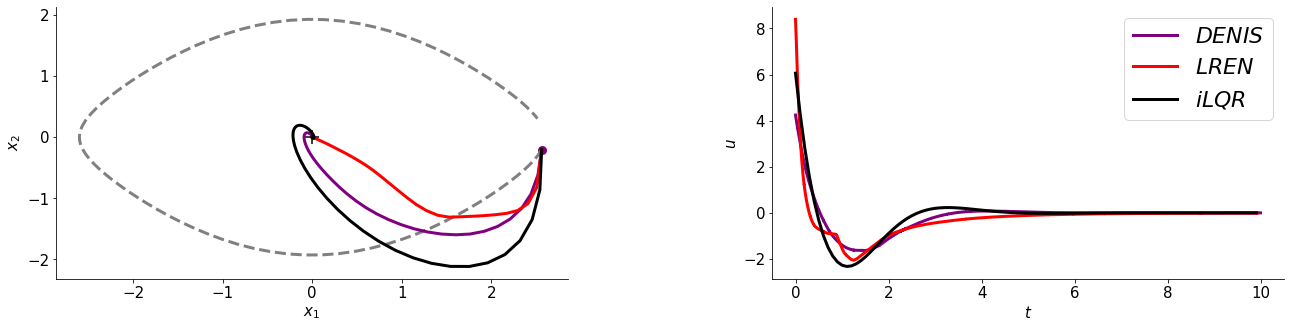

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(22, 5))
plt.rcParams.update({'font.size': 22})

num = 1
lw = 3
for i in range(num):
    j = idx[i]
    ax[0].plot(x_true[j, :, 0], x_true[j, :, 1], '--', color='grey', linewidth=lw)
    ax[0].plot(x_kooc_denis[i, :, 0], x_kooc_denis[i, :, 1], color='purple', linewidth=lw)
    ax[0].plot(x_kooc_lren[i, :, 0], x_kooc_lren[i, :, 1], color='red', linewidth=lw)
    ax[0].plot(x_ilqr[i, :, 0], x_ilqr[i, :, 1], color='black', linewidth=lw)
    ax[0].scatter(x_kooc_denis[i, 0, 0], x_kooc_denis[i, 0, 1], color='purple', linewidth=lw)
    ax[0].scatter(x_goal[0], x_goal[1], marker="+", color='k', s=200)
    ax[0].set_xlabel(r"$x_1$")
    ax[0].set_ylabel(r"$x_2$")
    
for i in range(num):   
    if i == 0:
        ax[1].plot(t_kooc_denis[i], u_kooc_denis[i], color='purple', label=r'$DENIS$', linewidth=lw)
        ax[1].plot(t_kooc_lren[i], u_kooc_lren[i], color='red', label=r'$LREN$', linewidth=lw)
        ax[1].plot(t, u_ilqr[i, :, 0], color='black', linewidth=lw, label=r'$iLQR$')
    else:
        ax[1].plot(t_kooc_denis[i], u_kooc_denis[i], color='purple', linewidth=lw)
        ax[1].plot(t_kooc_lren[i], u_kooc_lren[i], color='red', linewidth=lw)
        ax[1].plot(t, u_ilqr[i, :, 0], color='black', linewidth=lw)
    ax[1].set_xlabel(r"$t$")
    ax[1].set_ylabel(r"$u$")
    ax[1].legend()
    
for i in range(2):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    
plt.subplots_adjust(wspace=0.4)

In [11]:
animate(['LREN', 'iLQR', 'DENIS'], 'denis-lren-ilqr-down', 
        x_kooc_lren, x_ilqr, x_kooc_denis, interval=50)

In [111]:
x_goal = [np.pi, 0]
Q = [10, 0]
x_ilqr, u_ilqr, t = ilqr.simulate(init_cond, x_goal, 100, Q, 1)


results = kooc_lren.simulate(init_cond, x_goal, 100, [10, 0], r=0.25)
x_kooc_lren, u_kooc_lren, t_lren, t_kooc_lren = results

results = kooc_denis.simulate(init_cond, x_goal, 100, [10, 0], r=0.5)
x_kooc_denis, u_kooc_denis, t_denis, t_kooc_denis = results

100%|██████████| 18/18 [00:07<00:00,  2.41it/s]


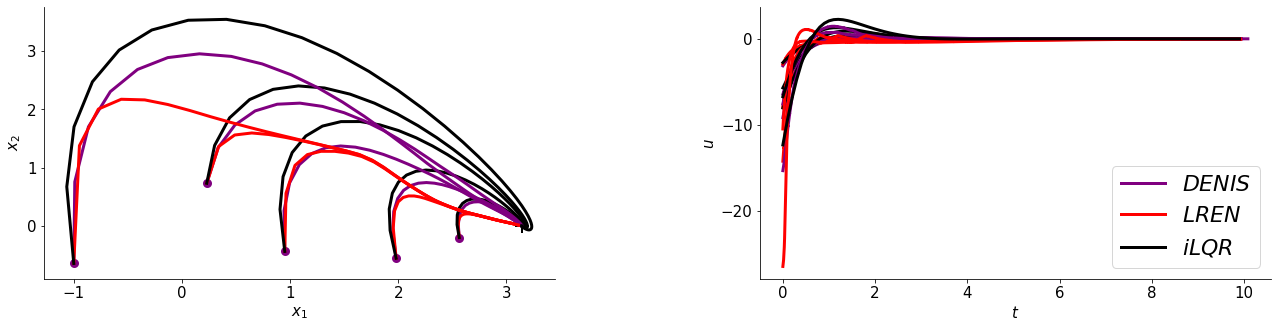

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(22, 5))
plt.rcParams.update({'font.size': 22})

num = 5
lw = 3
for i in range(num):
    j = idx[i]
    #ax[0].plot(x_true[j, :, 0], x_true[j, :, 1], '--', color='grey', linewidth=lw)
    #ax[0].plot(x_true[j, :, 0]+np.pi*2, x_true[j, :, 1], '--', color='grey', linewidth=lw)
    ax[0].plot(x_kooc_denis[i, :, 0], x_kooc_denis[i, :, 1], color='purple', linewidth=lw)
    ax[0].plot(x_kooc_lren[i, :, 0], x_kooc_lren[i, :, 1], color='red', linewidth=lw)
    ax[0].plot(x_ilqr[i, :, 0], x_ilqr[i, :, 1], color='black', linewidth=lw)
    ax[0].scatter(x_kooc_denis[i, 0, 0], x_kooc_denis[i, 0, 1], color='purple', linewidth=lw)
    ax[0].scatter(x_goal[0], x_goal[1], marker="+", color='k', s=200)
    ax[0].set_xlabel(r"$x_1$")
    ax[0].set_ylabel(r"$x_2$")
    
for i in range(num):   
    if i == 0:
        ax[1].plot(t_kooc_denis[i], u_kooc_denis[i], color='purple', label=r'$DENIS$', linewidth=lw)
        ax[1].plot(t_kooc_lren[i], u_kooc_lren[i], color='red', label=r'$LREN$', linewidth=lw)
        ax[1].plot(t, u_ilqr[i, :, 0], color='black', linewidth=lw, label=r'$iLQR$')
    else:
        ax[1].plot(t_kooc_denis[i], u_kooc_denis[i], color='purple', linewidth=lw)
        ax[1].plot(t_kooc_lren[i], u_kooc_lren[i], color='red', linewidth=lw)
        ax[1].plot(t, u_ilqr[i, :, 0], color='black', linewidth=lw)
    ax[1].set_xlabel(r"$t$")
    ax[1].set_ylabel(r"$u$")
    ax[1].legend()
    
for i in range(2):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    
plt.subplots_adjust(wspace=0.4)

In [113]:
animate(['LREN', 'iLQR', 'DENIS'], 'denis-lren-ilqr-upright', 
        x_kooc_lren, x_ilqr, x_kooc_denis, interval=50)